# Figures used in report
## Importing necessary modules 

In [1]:
import pandas as pd
import numpy as np
from time import time

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score


pd.set_option('display.max_columns', 500)
colors = plt.get_cmap("Dark2").colors

## Loading and preparing data 

In [2]:
df = pd.read_csv('data/csgo_round_snapshots.csv')
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,T

In [3]:
df_prepared = df.copy()
# checking on mising values, after this we choose how to handle with them
print(f'There are {df_prepared.isna().sum().sum()} missing values.')

# remove columsn with only one value
df_prepared = df_prepared.loc[:,df_prepared.nunique()!=1]

# cast categorical and boolean values to numeric
label_encoder = preprocessing.LabelEncoder() 
df_prepared.map = label_encoder.fit_transform(df_prepared.map)
df_prepared.bomb_planted = label_encoder.fit_transform(df_prepared.bomb_planted)
df_prepared.round_winner = label_encoder.fit_transform(df_prepared.round_winner)


# normalizations
standscl = preprocessing.StandardScaler()
standscl.fit(df_prepared)

# Here we are using z-score
df_scaled = pd.DataFrame(standscl.transform(df_prepared), columns=df_prepared.columns)
# except for the round_winner columns as this is what we are going to predict
df_scaled.round_winner = label_encoder.fit_transform(df_scaled.round_winner)

df_scaled

There are 0 missing values.


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,t_weapon_r8revolver,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,1.415828,-1.400576,-1.405702,-1.306410,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,-0.595345,-1.115364,-1.379297,-1.004951,0.602448,0.597412,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.673830,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,-0.021331,-0.098501,-0.271725,-0.079592,1.039382,-0.002858,-0.242763,-0.051389,-0.882806,-0.213485,-0.080226,-0.260603,-0.065298,-0.007001,-0.038268,-0.05062,-0.044438,-0.043684,-0.311208,-0.069177,-0.002858,-0.031325,-0.010306,-0.012783,-0.01246,-0.007562,-0.011785,-0.026822,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,1.942778,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,0
1,1.067531,-1.400576,-1.405702,-1.306410,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,-0.870776,-1.115364,-1.379297,-0.382199,0.602448,0.597412,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.673830,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,-0.021331,-0.098501,-0.271725,-0.079592,1.039382,-0.002858,-0.242763,-0.051389,-0.882806,-0.213485,-0.080226,-0.260603,-0.065298,-0.007001,-0.038268,-0.05062,-0.044438,-0.043684,-0.311208,-0.069177,-0.002858,-0.031325,-0.010306,-0.012783,-0.01246,-0.007562,-0.011785,-0.026822,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,1.942778,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,0
2,-0.034094,-1.400576,-1.405702,-1.306410,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,-1.115364,-1.379297,-0.382199,-0.227087,-0.216709,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.673830,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,-0.021331,-0.098501,-0.271725,-0.079592,0.424292,-0.002858,-0.242763,-0.051389,-0.882806,-0.213485,-0.080226,-0.260603,-0.065298,-0.007001,-0.038268,-0.05062,-0.044438,-0.043684,-0.311208,-0.069177,-0.002858,-0.031325,-0.010306,-0.012783,-0.01246,-0.007562,-0.011785,-0.026822,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,-0.409385,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.

In [4]:
def perform_ML(method, data):
    data_train, data_test, results_train, results_test = train_test_split(data.drop('round_winner', axis=1), 
                                                                          data.round_winner, 
                                                                          test_size=0.2
                                                                         )
    model = method()
    
    dt = time()
    model.fit(data_train, results_train)
    pred = model.predict(data_test)
    dt = time()-dt
    
    acc = 100*accuracy_score(results_test, pred)
    
    return method.__name__, acc, dt


In [ ]:
methods = [LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis, GaussianNB,
           LogisticRegression, DecisionTreeClassifier, RandomForestClassifier#, MLPClassifier
          ]
N=20

df_final = pd.DataFrame(columns=['method', 'id', 'accuracy', 'time'])
df_final.set_index(['method', 'id'], inplace=True)

for method in methods:
    for ii in range(N):
        name, acc, dt = perform_ML(method, df_scaled)
        df_final.loc[(name, ii), 'accuracy'] = acc
        df_final.loc[(name, ii), 'time'] = dt


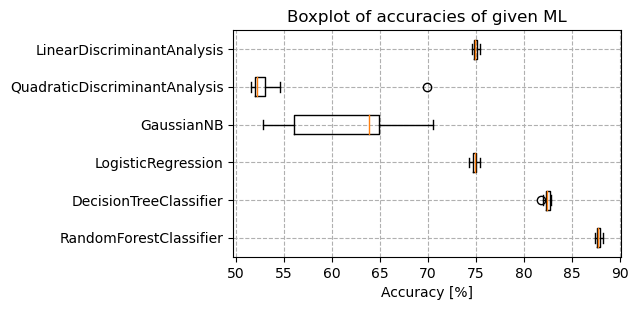

In [6]:
fig, ax = plt.subplots(figsize=(5,3), dpi=100)

ii=0
for idx in df_final.index.get_level_values(0).unique():
    ii-=1
    ax.boxplot(df_final.loc[idx, 'accuracy'], vert=False, positions=[ii], widths=0.5)


ax.set_xlabel('Accuracy [%]')
ax.set_title('Boxplot of accuracies of given ML')
ax.set_yticklabels(df_final.index.get_level_values(0).unique())
ax.grid(ls='--')

plt.savefig(f'plots/fig_1.pdf', transparent=True, bbox_inches='tight')
plt.show()

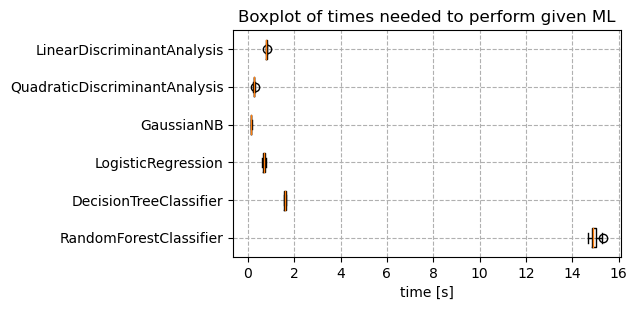

In [7]:
fig, ax = plt.subplots(figsize=(5,3), dpi=100)

ii=0
for idx in df_final.index.get_level_values(0).unique():
    ii-=1
    ax.boxplot(df_final.loc[idx, 'time'], vert=False, positions=[ii], widths=0.5)


ax.set_xlabel('time [s]')
ax.set_title('Boxplot of times needed to perform given ML')
ax.set_yticklabels(df_final.index.get_level_values(0).unique())
ax.grid(ls='--')

plt.savefig(f'plots/fig_2.pdf', transparent=True, bbox_inches='tight')
plt.show()

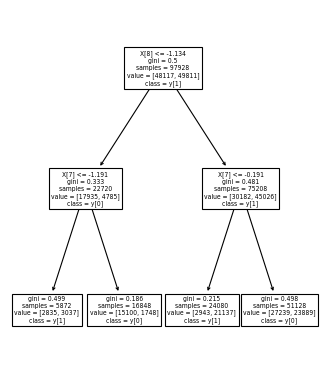

In [8]:
from sklearn import tree

# setting seed for reproducity
np.random.seed(2)

# splitting data into training and testing datasets
data_train, data_test, results_train, results_test = train_test_split(df_scaled.drop('round_winner', axis=1), df_scaled.round_winner, 
                                                                      test_size=0.2)

model = DecisionTreeClassifier(max_leaf_nodes=4)

model.fit(data_train, results_train)
pred = model.predict(data_test)

fig, ax = plt.subplots(figsize=(5,6), dpi=80)
tree.plot_tree(model, ax=ax, class_names=True)
plt.savefig(f'plots/fig_3.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [9]:
# X[8] stands for 't_armor'
# X[7] stands for 'ct_armor'
val0 = -1.134
val0 *= np.sqrt(df.t_armor.var())
val0 += df.t_armor.mean()
print(f't_armor < {val0:.2f}')

val1 = -1.191
val1 *= np.sqrt(df.ct_armor.var())
val1 += df.ct_armor.mean()
print(f'ct_armor < {val1:.2f}')

val2 = -0.191
val2 *= np.sqrt(df.ct_armor.var())
val2 += df.ct_armor.mean()
print(f'ct_armor < {val2:.2f}')

t_armor < 100.47
ct_armor < 110.45
ct_armor < 281.48


In [10]:
weapons = [
            'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
            'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
            'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
            't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
            'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
            't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
            'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
            'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
            'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
            'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
            'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
            'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
            't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
            'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
            't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
            'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
            't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
            'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
            't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
            't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
            'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
            't_grenade_flashbang', 'ct_grenade_smokegrenade',
            't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
            't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
            't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
            't_grenade_decoygrenade'
          ]

df_weapons = df.copy()
df_weapons = df_weapons.loc[:,weapons].sum()
df_weapons.sort_values(inplace=True, ascending=True)
df_weapons = df_weapons/(df.shape[0])
df_weapons = 100*df_weapons/5
df_weapons

ct_weapon_negev            0.000000
ct_weapon_r8revolver       0.000000
ct_weapon_bizon            0.000000
ct_weapon_sawedoff         0.000000
t_weapon_m249              0.000000
                            ...    
t_grenade_smokegrenade    32.542929
ct_grenade_flashbang      37.063148
t_grenade_flashbang       37.161997
ct_weapon_usps            63.595785
t_weapon_glock            66.203905
Length: 80, dtype: float64

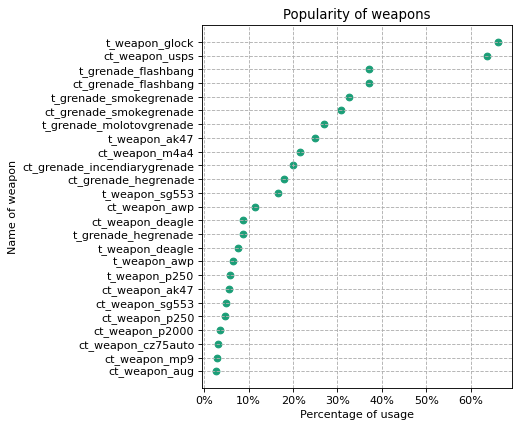

In [11]:
fig, ax = plt.subplots(figsize=(5,6), dpi=80)

offset = 25
ax.scatter(df_weapons[-offset:], df_weapons.index[-offset:], color=colors[0])

ax.set_title('Popularity of weapons')
ax.grid(ls='--')
ax.set_xlabel('Percentage of usage')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Name of weapon')

plt.savefig(f'plots/fig_4.pdf', transparent=True, bbox_inches='tight')
plt.show()

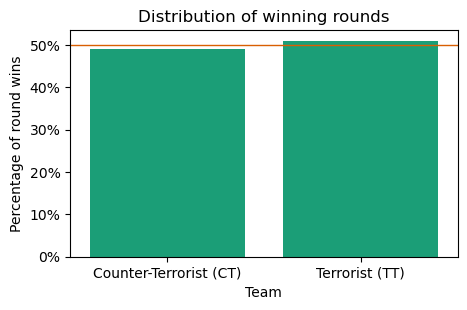

In [12]:
df_win = df.copy()
df_win = df_win.loc[:,['time_left', 'round_winner']].groupby('round_winner').count()
df_win = df_win/df.shape[0]*100

x_values = [df_win.loc['CT', 'time_left'], df_win.loc['T', 'time_left']]
y_values = ["Counter-Terrorist (CT)", "Terrorist (TT)"]


fig, ax = plt.subplots(figsize=(5,3), dpi=100)

ax.bar(y_values, x_values, align='center', color=colors[0])
ax.plot([-10,10], [50, 50], color=colors[1], linewidth=1)

ax.set_title('Distribution of winning rounds')
ax.set_xlabel('Team')
ax.set_ylabel('Percentage of round wins')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlim(-0.5, 1.5)

plt.savefig(f'plots/fig_5.pdf', transparent=True, bbox_inches='tight')
plt.show()